In [1]:
import pandas as pd
import matplotlib.pyplot as plt

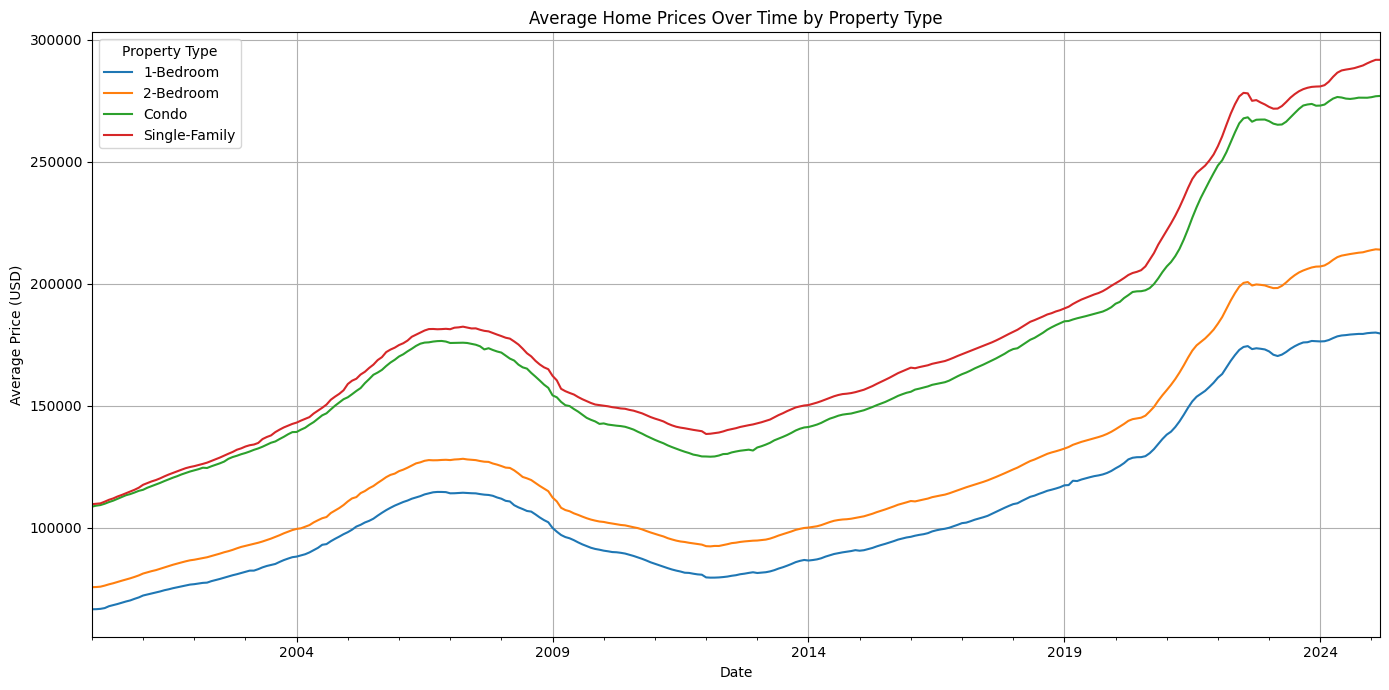

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Helper function to load and reshape
def load_price_series(filepath, label):
    df = pd.read_csv(filepath)
    df_long = df.melt(
        id_vars=['RegionID', 'RegionName', 'SizeRank', 'RegionType', 'StateName'],
        var_name='Date',
        value_name='Price'
    )
    df_long['Date'] = pd.to_datetime(df_long['Date'])
    avg_price = df_long.groupby('Date')['Price'].mean()
    return avg_price.rename(label)

# Load and process each dataset
price_1bed = load_price_series('data/Metro_zhvi_bdrmcnt_1_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv', '1-Bedroom')
price_2bed = load_price_series('data/Metro_zhvi_bdrmcnt_2_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv', '2-Bedroom')
price_condo = load_price_series('data/Metro_zhvi_uc_condo_tier_0.33_0.67_sm_sa_month.csv', 'Condo')
price_sfr = load_price_series('data/Metro_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month.csv', 'Single-Family')

# Combine into one DataFrame
all_prices = pd.concat([price_1bed, price_2bed, price_condo, price_sfr], axis=1)

# Plot
plt.figure(figsize=(14, 7))
all_prices.plot(ax=plt.gca())
plt.title('Average Home Prices Over Time by Property Type')
plt.xlabel('Date')
plt.ylabel('Average Price (USD)')
plt.legend(title='Property Type')
plt.grid(True)
plt.tight_layout()
plt.show()
